<span style="font-family: Times New Roman; font-weight: Italics;font-size:3.2em;color:magenta; text-indent: 50px">Capstone Project

<font color = "#483D8B">
    
### <u>Problem statement:</u>

<font size =3> 
<font color = "#483D8B">


A house value is simply more than location and square footage. Like the features that makeup a person, an educated party would want to know all aspects that give a house its value. Forexample, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. To find house price you usually try to find similar properties in your
neighbourhood and based on gathered data you will try to assess your house price

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline
import warnings
import statsmodels.formula.api as sm
import scipy, scipy.stats
import math # log function is inside this library
# this is used to get the plots inline i.e. in the same page
from collections import Counter

## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report


## Setting Options

In [2]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Step-1 Import and warehouse data:

In [3]:
#1.Import the given dataset and explore shape and size

df=pd.read_csv("innercity.csv")
print("Shape of Dataset :", df.shape)

Shape of Dataset : (21613, 23)


In [4]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.2500000,3020,13457,1.0000000,0,0,5,9,3020,0,1956,0,98133,47.7174000,-122.3360000,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.5000000,2550,7500,1.0000000,0,0,3,8,1750,800,1976,0,98023,47.3165000,-122.3860000,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.5000000,2370,4324,2.0000000,0,0,3,8,2370,0,2006,0,98038,47.3515000,-121.9990000,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.0000000,820,3844,1.0000000,0,0,4,6,820,0,1916,0,98133,47.7049000,-122.3490000,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.5000000,1400,4050,1.0000000,0,0,4,8,1400,0,1954,0,98115,47.6768000,-122.2690000,1900,5940,0,5450


In [5]:
#make a copy of dataset before data cleansing/pre-processing
df_cpy = df.copy(deep = True)

In [6]:
#Create a Dataframe for storing model outputs
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Step-2 Data cleansing:

In [7]:
#Explore and if required correct the datatypes of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [8]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

***Datatype change***

In [9]:
#2.Explore for null values in the attributes and if required drop or impute values. 
# check for missing values
missing_values = df.isnull().sum()

# print the number of missing values of each variable
print(missing_values)

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64


<font color=green>
 <font size = 3>
 
- There is no null values in the given dataset

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Step-3 Data analysis & visualisation: 

In [10]:
#detailed statistical analysis on the data. 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cid,21613.0000000,4580301520.8649883,2876565571.3120589,1000102.0000000,2123049194.0000000,3904930410.0000000,7308900445.0000000,9900000190.0000000
price,21613.0000000,540182.1587933,367362.2317180,75000.0000000,321950.0000000,450000.0000000,645000.0000000,7700000.0000000
room_bed,21613.0000000,3.3708416,0.9300618,0.0000000,3.0000000,3.0000000,4.0000000,33.0000000
room_bath,21613.0000000,2.1147573,0.7701632,0.0000000,1.7500000,2.2500000,2.5000000,8.0000000
living_measure,21613.0000000,2079.8997363,918.4408970,290.0000000,1427.0000000,1910.0000000,2550.0000000,13540.0000000
lot_measure,21613.0000000,15106.9675658,41420.5115151,520.0000000,5040.0000000,7618.0000000,10688.0000000,1651359.0000000
ceil,21613.0000000,1.4943090,0.5399889,1.0000000,1.0000000,1.5000000,2.0000000,3.5000000
coast,21613.0000000,0.0075418,0.0865172,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000
sight,21613.0000000,0.2343034,0.7663176,0.0000000,0.0000000,0.0000000,0.0000000,4.0000000
condition,21613.0000000,3.4094295,0.6507430,1.0000000,3.0000000,3.0000000,4.0000000,5.0000000


In [11]:
#Separation of Numerical Varaibles in dataset

num_vars1 = df.columns[df.dtypes != 'object']

cat_var1 = df.columns[df.dtypes == 'object']

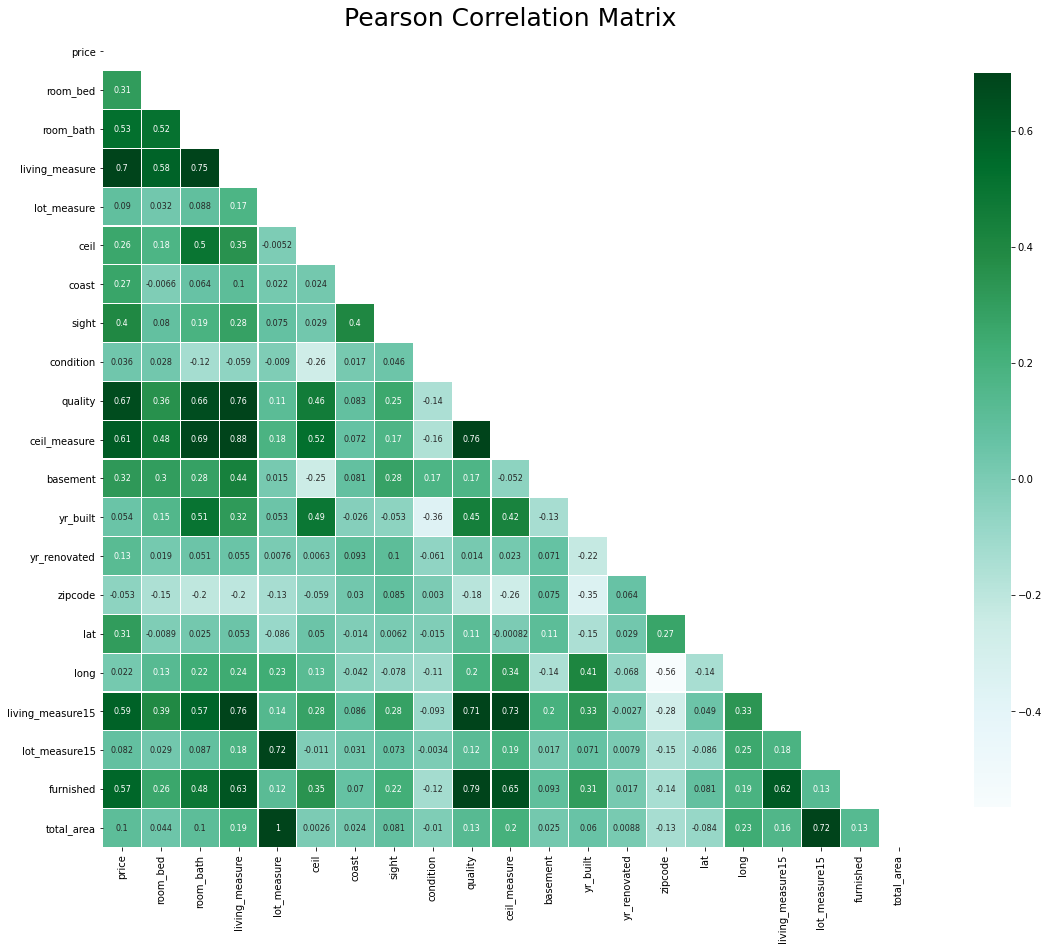

In [12]:
#Checking Out the Correlation Among Explanatory Variables
features = ['price','room_bed', 'room_bath', 'living_measure','lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(20, 15))
plt.title('Pearson Correlation Matrix',fontsize=25)

#Plotting heatmap for correlation
sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

<span style="font-family: Times New Roman; font-weight: Bold Italics;font-size:1.5em;color:#6b8e23"><u>**Stastical Analysis on Dataset:**</u>
    
<font color=#6b8e23>  

    
**From the above pairplot and heatmap we can get below inferences:**

- *The highest positive correlated variables are living_measure and ceil_measure i.e 0.88 which could lead to Mulitcollinearity*
- *The second positive correlated variables are living_measure and living_measure15 0.76*
- *Zipcode and ceilmeasure are strongly negavtive correlated - -0.23*

<span style="font-family: Times New Roman; font-weight: Italics;font-size:1.85em;color:purple">**Univariate Analysis**:

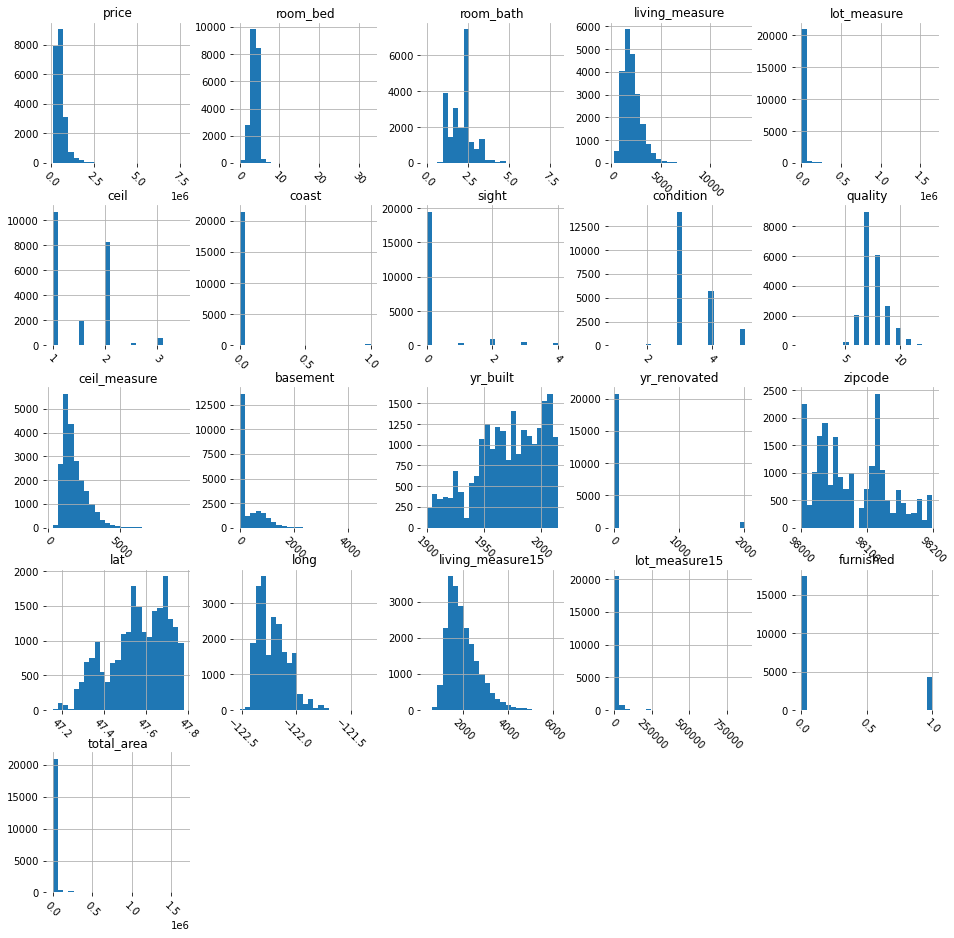

In [13]:
#histograms of dataframe.
df1=df[['price','room_bed', 'room_bath', 'living_measure','lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-45)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

***Analysis report on Univariation***

<span style="font-family: Times New Roman; font-weight: Italics;font-size:1.85em;color:purple">**Bivariate Analysis**

In [14]:
sns.set(style="whitegrid", font_scale=1)

[Text(0.5, 0, 'Furnished'), Text(0, 0.5, 'Price')]

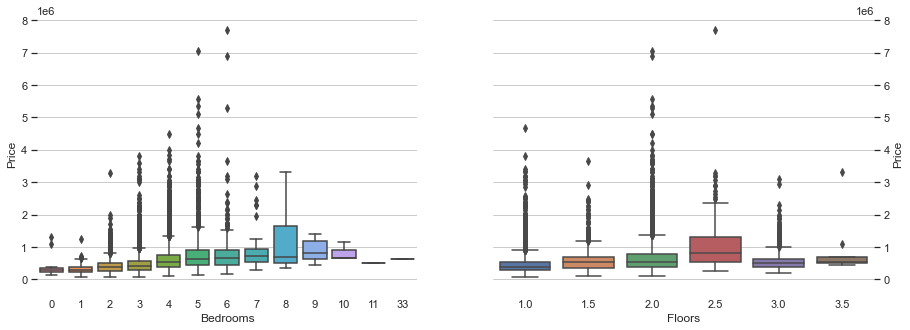

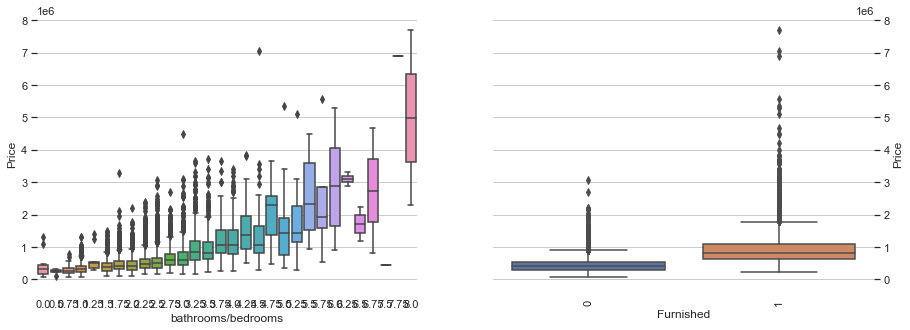

In [42]:
#Plotting box charts for Bedrooms,Ceil,Bathrooms/bedrooms Vs Price
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['room_bed'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['ceil'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axes = plt.subplots(1, 2,figsize=(15,5))
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['room_bath'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['furnished'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='bathrooms/bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Furnished', ylabel='Price')


<font color = #A52A2A>
<font size = 3>
    
- From the above charts, it can be seen that there are very few houses which have some features or price appears far from others like 33 bedrooms or price around 7000000. However, determining their possible negative effect will be time consuming and in the real data sets there will always be some outliers like some luxury house prices in this dataset. That's why it is better to not planning for remove outliers

<span style="font-family: Times New Roman; font-weight: Italics;font-size:1.85em;color:purple">**Multivariate Analysis**

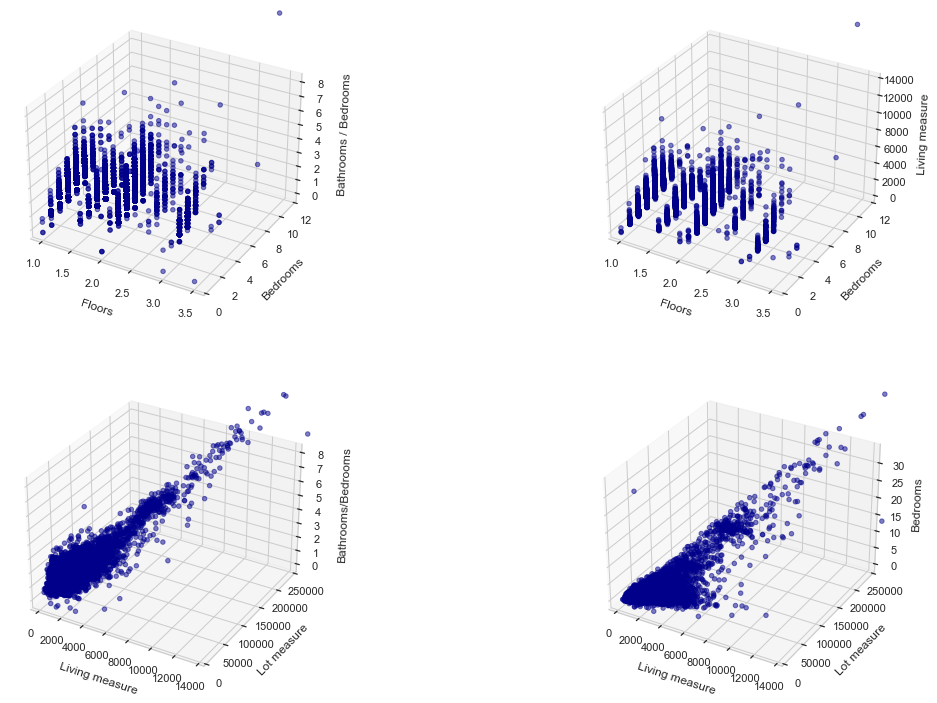

In [16]:
#Plotting  3d charts for Price Vs Some features in the dataframe
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1, projection="3d")
ax.scatter(df['ceil'],df['room_bed'],df['room_bath'],c="darkblue",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(df['ceil'],df['room_bed'],df['living_measure'],c="darkblue",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nLiving measure')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3, projection="3d")
ax.scatter(df['living_measure'],df['lot_measure'],df['room_bath'],c="darkblue",alpha=.5)
ax.set(xlabel='\n Living measure',ylabel='\nLot measure',zlabel='\nBathrooms/Bedrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(df['living_measure'],df['lot_measure'],df['room_bed'],c="darkblue",alpha=.5)
ax.set(xlabel='\n Living measure',ylabel='\nLot measure',zlabel='Bedrooms')
ax.set(ylim=[0,250000]);

<font color ='#00008B'>
<font size=3>

- In the previous 3D plots, dark blue has been used as the point color. Dark blue parts mean high density, many light blue points overlap and become darker.
- From the above chart, it is evident that , when the living_meaure increases, lot_measure and bedrooms or bathrooms/bedrooms increases. However, the Ceil, bedrooms and bathrooms/bedrooms or living_measure does not have a similar relationship.

[Text(0.5, 0, 'Sight'), Text(0, 0.5, 'Price')]

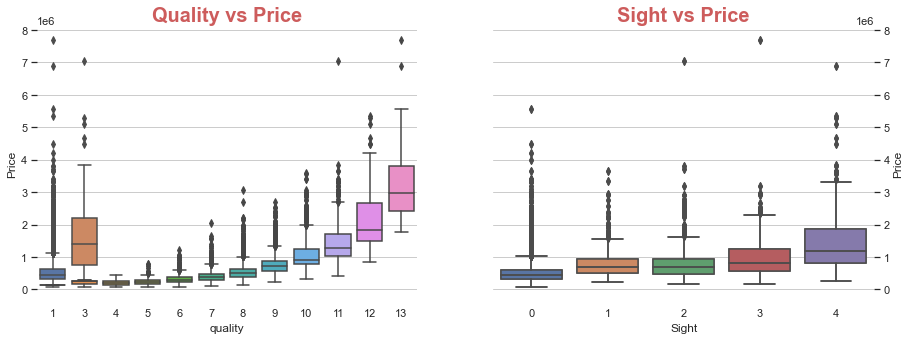

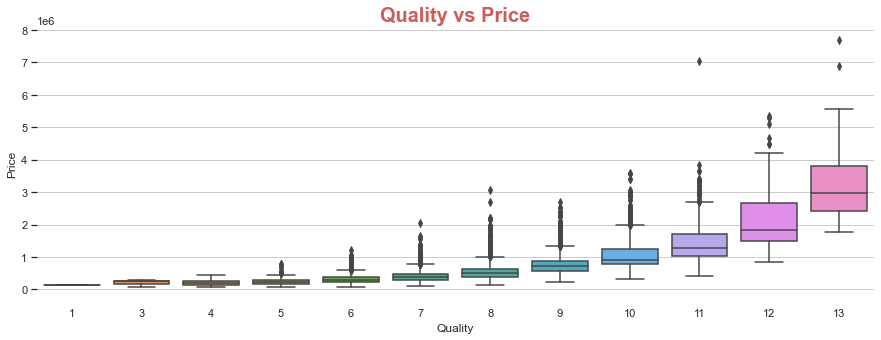

In [17]:
#Visualizing more features
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['coast'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['sight'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set_title("Coast vs Price",fontsize = 20,fontweight ="bold",color='#CD5C5C')
axes[0].set(xlabel='Coast', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].set_title("Sight vs Price",fontsize = 20,fontweight ="bold",color='#CD5C5C')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Sight', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=df['quality'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set_title("Quality vs Price",fontsize = 20,fontweight ="bold",color='#CD5C5C')
axe.yaxis.tick_left()
axe.set(xlabel='Quality', ylabel='Price');

sns.boxplot(x=df['quality'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['sight'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set_title("Quality vs Price",fontsize = 20,fontweight ="bold",color='#CD5C5C')
axes[0].set(xlabel='quality', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].set_title("Sight vs Price",fontsize = 20,fontweight ="bold",color='#CD5C5C')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Sight', ylabel='Price')

<font color ='#CD5C5C'>
<font size=3>


- When we look at the above boxplots, Qulaity and Coast effect price visibly. 
- On the other hand, Sight seems to effect less but it also has an effect on price.

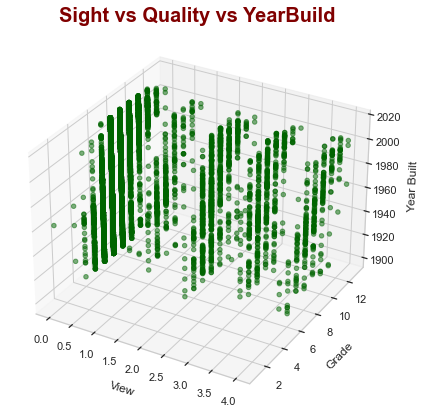

In [18]:
#Plotting 3d chart for sight,quality and year
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.set_title("Sight vs Quality vs YearBuild",fontsize = 20,fontweight ="bold",color='#800000')
ax.scatter(df['sight'],df['quality'],df['yr_built'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nView',ylabel='\nGrade',zlabel='\nYear Built');

 <font color ='#800000'>
<font size=3>

- The below chart shows that the newer houses have better grades but we can not say much about the change in the view.